<a href="https://colab.research.google.com/github/JayeonKangNature/2022_Summer_Internship/blob/main/Self_Study_Code/Week2_CIFAR_10_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<font size=6>Task 1: CIFAR-10 Image Classification**<br>
<font size = 4>Jayeon Kang


---



##I.	Read the code/comments carefully. Describe any part of the code or comments that you don't understand, or that you are curious and what to understand better.




### 0. Introduction

**Torchvision**<br>
Torchvision has two subpackages
  - Common datasets<br>
    like ImageNT, CIFAR10, MNIST, ...
  - Data transformers<br>
    for torchvision.datasets and torch.utills.daata.DataLoader

**CIFAR-10<br>**
CIFAR-10
- Built-in dataset<br>

Element of CIFAR-10
- Images with 3x32x32: 32x32 pixels and 3-channel color images. (number of channels x hight x base)
- 10 classes of objuets: 6 of animals (bird, cat, deer, dog, frog, horse) and 4 of vechicles (airplane, automobile, ship, truck)

**Steps for classification**<br>
1. Loading and normalize datasets (train and validation/test) by 'torchvision' = Preprocessing datasets
2. Create CNN
3. Create loss funcion
4. Train NetWork through training set
5. Valid/Test Network through test/validation set

### 1. Load and normalize CIFAR10

<font size= 4>
1) Create environment

In [ ]:
import torch
import torchvision
# take out torch and torchvision
import torchvision.transforms as transforms
# transforms moules in torchvision is defined transforms for now

<font size= 4>
2) Normalize images: to deal with the images,

In [ ]:
transform = transforms.Compose(
    (transforms.ToTensor(), # convert tensor type
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))))

* **transforms.ToTensor()**<br>
 + *Function*: Convert images loaded by Pillow into PyTorch tensors.<br>
 + *Pillow image (PIL)*: PIL is the Python Imaging Library which provides the python interpreter with image editing capabilities. The Image module provides a class with the same name which is used to represent a PIL image.<br>

* **transforms.Normalize()**<br>
 + *Function*: Manupulate the values in our tensors so that their average is 0 and their standard deviation is 0.5.</span><br>
Most activation functions have their strongest gradients around x = 0, so centering our data there can speed learning.
 + *Syntax*: transforms.Normalize(mean, std, inplace=False)
 + *More explanation*: Normalization is process to normalize mean and standard deviation set from each channels. For example, as input (m1, m2, m3) and (s1, s2, s3), image for each channels is normalized into below formula:<br><br>
$$output[channel] = (input[channel]−m[channel])÷s[channel]​$$

* **transforms.Compose()**
  + *Function*: it will compose several transforms together. That is, it can chain (= together) transformaiton functions.
  + *Syntax*: transforms.Compose (transforms)
  + In this case, converting tensor type and normalizing are used as transform.<br> So, two things are proceessed in Compose method
  


<font size= 4>
3) Download data from torchvision

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


**Mean of parameters**
* root: location to download data
* tain: as reciving bool value,
  + True = downlad **train** data set
  + False = downlad **test** data set
* download: as reciving bool value,
  + True = **through internet** download data
  (if already download data though download is True, pass without download)
* transform: Preprocessing PIL Image based on setting transform format previously

**Considerations to initiate our dataset**
* Desired Path for the filesystem that we want
* Determinant for spliting our dataset into training and test/validation subsets
* Whether we would like to download the dataset if we haven't already.

<font size= 4>
4) Create Data_loader to utilize data

In [ ]:
trainloader = torch.utils.data.DataLoader(dataset=trainset, batch_size=4,shuffle=True,num_workers=2)
testloader = torch.utils.data.DataLoader(dataset=testset, batch_size=4,shuffle=False,num_workers=2)

In [ ]:
print(iter(testloader))

**DataLoader**
* Function: To deal with dataset, return iterable form as joining data set and sampler as if the function makes data set able for using 'for' loop.

**Parameters**
* dataset: data set gotten from torchvision and used for our trainning/ testting/ validating
* batch_size: how much data you'll pull out once one time of sampling
* shuffle: whether does shuffle (= mix) datasets for each epoch or not
* num_workers: To load data, how many subprocesses are used. Simply, it is the number of thread
 + Thread: an entity within a process that can be scheduled for execution

​
**Our case**
* batch_size = 4: give us batches of 4 images from trainset.
* shuffle = True: give randomizing our order.
* num_wrkers = 2: spin up two workers to load data from disk.<br>
num_workers denotes the number of processes that generate batches in parallel.


In [ ]:
i = 1
for data in trainloader:
    images, labels = data
    print(f'set {i} train images labels: {labels.tolist()}')
    print(f'image size: {images.size()}')
    print(f'label size: {labels.size()}')
    i += 1
    if i == 4:
      break

set 1 train images labels: [7, 3, 4, 3]
image size: torch.Size([4, 3, 32, 32])
label size: torch.Size([4])
set 2 train images labels: [8, 0, 9, 3]
image size: torch.Size([4, 3, 32, 32])
label size: torch.Size([4])
set 3 train images labels: [4, 5, 1, 5]
image size: torch.Size([4, 3, 32, 32])
label size: torch.Size([4])


**Composition of DataLoader**<br>
Trainloader consist of two tings: image and label (as well as testloader)<br>
As see above output of above code (as seeing three of train image),
* Due to batch_size = 4, 4 images are selected and size of label is 4.
* Due to shuffle = True, there are random selected image for each set.
* Tensor of images is [4, 3, 32, 32]
* Each objects' label is indicated as range from 0 to 9.

<font size=4>
5) Ploting

In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
print(trainset.class_to_idx)

{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


0 = plane/ 1 = car/ 2 = bird/ 3 = cat/ 4 = deeer/ 5 = dog/ ....

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img * 0.5 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


In [ ]:
print(type(images))
print(type(images.numpy()))

<class 'torch.Tensor'>
<class 'numpy.ndarray'>


**Function of imshow(img)**<br>
* img = img * 0.5 + 0.5
  + Unnormalize image step. According to given above normalize formula, output is converted into input value.
  $$output[channel] = (input[channel]−m[channel])÷s[channel]​$$ <br>
   $$⇓$$ $$input[channel] = output[channel] * s[channel] + m[channel]$$
* npimg = img.numpy()
  + Convert images' data type from Tensor into Array.
* plt.imshow(np.transpose(npimg, (1, 2, 0)))
  + np.transpose(npimg, (1, 2, 0))
    - *Sytax*: numpy.transpose(a, axes=None)
    - *Parameter*: <br>
      a: aarray_like<br>
        => Input array
       axes: axestuple or list of ints, optional<br>
    => If specified, it must be a tuple or list which contains a permutation of [0,1,..,N-1] where N is the number of axes of a. The i’th axis of the returned array will correspond to the axis numbered axes[i] of the input. If not specified, defaults to range(a.ndim)[::-1], which reverses the order of the axes.
    - *Return*: return ndarray that is reversed or permuted the axes of an array; returns the modified array. For an array a with two axes, transpose(a) gives the matrix transpose.
  + plt.imshow(X)
    - *Syntax*: https://www.geeksforgeeks.org/matplotlib-pyplot-imshow-in-python/
    - *Return*: returns the AxesImage
* plt.show()
  - *Return*: return setting plot above plt.show() code
* What does the function return?
  + *Return*: Plot unnormalized image to graph


In [ ]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

**Training image extraction**<br>
To extract data from trainloader (in this case, take data by using .next() function), because trainloader (DataLoader) is not iterlater form, we have to change iterable type by using iter().

After that, by using .next() function, bring elements from data sets in order.

In [ ]:
print(type(trainloader))
print(type(dataiter))
print(trainloader.next())
print(dataiter.next())

<class 'torch.utils.data.dataloader.DataLoader'>
<class 'torch.utils.data.dataloader._MultiProcessingDataLoaderIter'>


AttributeError: ignored

As seeing above result, DataLoader does not have attribute 'next' and there is another object to be able to use iterater.<br>


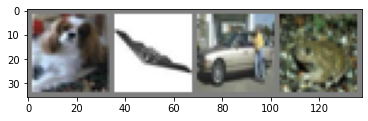

  dog plane   car  frog


In [ ]:
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

Shows results

### 2. Create Convolution Neural Network (CNN)

**Detail Information**<br>
https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

### 3. Define a Loss function and optimizer

To train, we need Loss function and optimizer.<br>
Thus, define the cross-entropy Loss function to be learned about classification and
Optimizer is dified as Stochastic Gradient Descent (SGD)

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

**.CrossEntropyLoss( )**
  + .CrossEntropyLoss( ): loss function for calssification<br>
  + Loss: Loss functions are used to gauge the error between the prediction output and the provided target value. A loss function tells us how far the algorithm model is from realizing the expected outcome. The word 'loss' means the penalty that the model gets for failing to yield the desired results.
  + More informatin for .CrossEntropyLoss( ):  https://nuguziii.github.io/dev/dev-002/

**optim.SGD**
* What is SGD?: Algorithm to find the model parameters that correspond to the best fit between predicted and actual outputs.
* Return from SGD: return optimal parameters.
* optim.SGD parameters
  + lr: learning rate <br>
    - learning rate: learning rate is one of the key hyperparameters for gradient descent. It scales the magnitude of the model's weight updates in order to minimize the model's loss.
  + net.parameters( ): collection of all the learning weights in the models, which is what the optimizer adjusts. <br>
  + momentum: momentum or SGD with momentum is method which helps accelerate gradients vectors in the right directions, thus leading to faster converging. <br>

**Other optimizer**<br>
Adam/ Adadelta/ Adagrad/ AdamW/ Adamax/ RMSProp<br>
Detail information about them:
https://machinelearningknowledge.ai/pytorch-optimizers-complete-guide-for-beginner/

### 4. Training

As forming loop (= epoch), be learned about iterator from preproccessed data from us

<font size=4>
1) Training

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0 # it just use for print statistics. This line doesn't involve in train

    for i, data in enumerate(trainloader, 0):
        # (Step 1)
        # get the inputs; data is a list of [inputs, labels]
        # Every data instance is an input + label pair
        inputs, labels = data
        # (Step 2)
        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # forward + backward + optimize
        # (Step 3)
        # Make predictions for this batch
        outputs = net(inputs)
        # (Step 4)
        loss = criterion(outputs, labels) # Loss/ criterion = nn.CrossEntropyLoss(). That is criterioin is loss class
        # (Step 5)
        loss.backward() # Gradient
           # Step 4 and Step 5 are compute loss and its gradients
        # (Step 6)
        # Adjust learning weights
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.307
[1,  4000] loss: 2.308
[1,  6000] loss: 2.307
[1,  8000] loss: 2.308
[1, 10000] loss: 2.307
[1, 12000] loss: 2.308
[2,  2000] loss: 2.307
[2,  4000] loss: 2.307
[2,  6000] loss: 2.308
[2,  8000] loss: 2.308
[2, 10000] loss: 2.306
[2, 12000] loss: 2.308
Finished Training


Below, we have a function that performs one training epoch. It enumerates data from the DataLoader, and on each pass of the loop does the following:

* Step 1: Gets a batch of training data from the DataLoader
* Step 2: Zeros the optimizer’s gradients
* Step 3: Performs an inference - that is, gets predictions from the model for an input batch
* Step 4: Calculates the loss for that set of predictions vs. the labels on the dataset
* Step 5: Calculates the backward gradients over the learning weights
* Step 6: Tells the optimizer to perform one learning step - that is, adjust the model’s learning weights based on the observed gradients for this batch, according to the optimization algorithm we chose <br>=> In this stage, our model is modified.
* It reports on the loss for every 1000 batches.
* Finally, it reports the average per-batch loss for the last 1000 batches, for comparison with a validation run

\+ 'enumerate()' syntax<br>
  * enumerate(Iterable, Start=0)
    + Start: the index value from which the counter is to be started, by default it is 0
    + Iterable: any object that supports iteration

About Backpropagation (AUTOMATIC DIFFERENTIATION WITH) <br>
https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html

<font size=4>
2) Save our Network

In [ ]:
# Mounting
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

Mounted at /content/drive


In [ ]:
import os
file_name = 'cifar_net.pth'
print(os.path.realpath('archive'))

/content/archive


**Save and load model**<br>
https://tutorials.pytorch.kr/beginner/saving_loading_models.html

### 5. Test

Check that our network is learned well previously (for example, whether the learning is overfitted or not) as comparing Ground Truth and predicted value from our network by using extracted images  arbitrary. <br><br>


**Ground Truth**

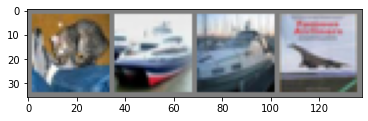

GroundTruth:    cat  ship  ship plane


In [ ]:
# Take our one image set with labels
dataiter = iter(testloader)
images, labels = dataiter.next()

# Print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

**Predicted value**

In [ ]:
# Load our trainned model saved above
PATH = './cifar_net.pth'
net = Net()
net.load_state_dict(torch.load(PATH))
# Return pridcted value from the loaded model
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    car   car   car   car


loading pre-trainned model saved above as assigning saved parameter value from the saved model about Network, take out preicted value from the model.

In [ ]:
print(torch.max(outputs,1))

torch.return_types.max(
values=tensor([0.1423, 0.1449, 0.1282, 0.1461], grad_fn=<MaxBackward0>),
indices=tensor([1, 1, 1, 1]))


* torch.max( ): return extracted ouputs and its indicator that are came from maximum values for each results.
  + ouput: Set of maximum values
  + indicator: Set of indexes of each output
however, in our case, we only need indicator.<br> So, that is why we write "_, predicted = torch.max(outputs, 1)"
  + Parameter in our case
    - torch.max(Tensor, dimension)<br>
      - Tensor: the input tensor<br>
      - dimension: the dimension to reduce.
    - our case: torch.max(output, 1)<br>
      - output: input tensor
      - 1: we reduce dimension into 1D
      - Thus, take out maximum value from output and reduce dimension into 1D

* More detail about torch.max( ): https://pytorch.org/docs/stable/generated/torch.max.html

### 6. Estimating Accuracy

In [ ]:
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 10 %


Above stpes are process to find accuracy for whole test sets.

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Through above code, we know each class's accuracy.<br>
Based on those accuracy, we know whether wihch class predict well or not.

### 7. Train on GPU

**What is Training on GPU**<br>
Process to move Network (Tensor) into GPU device

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

To train on GPU, define device.<br>

In [ ]:
net.to(device)

If device is fixed, upload Network into device.

## II.	How is the label for one datapoint represented? A datapoint can be understood as an image in the training or testing dataset.

In [ ]:
data, label = iter(trainloader).next()
print(f'lable its image: {label.tolist()}')

lable its image: [5, 4, 7, 6]


According to above code, each data's label is represented with number.